In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
gdp = pd.read_csv('RealGDP.csv')

In [4]:
gdp.head()

,DATE,A191RL1Q225SBEA
0,1947-04-01,-1.0
1,1947-07-01,-0.8
2,1947-10-01,6.4
3,1948-01-01,6.2
4,1948-04-01,6.8


Using a different time series data set (either from FRED or elsewhere, go about the process of time series modeling. Specifically generate the following things:

Plot the time series, along with any logical or necessary differences to get a stationary dataset

Generate and interpret a PACF for the time series (and/or its differences)

Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data

Finally choose one specification and make the case for that as a logical model for your dataset.

This should come in the form of a notebook with the necessary prose to explain your process. Remember to use the tools of text, visuals, and analysis to tell a clear and concise story with your data.

Text(0.5, 1.0, 'Real GDP vs. Time')

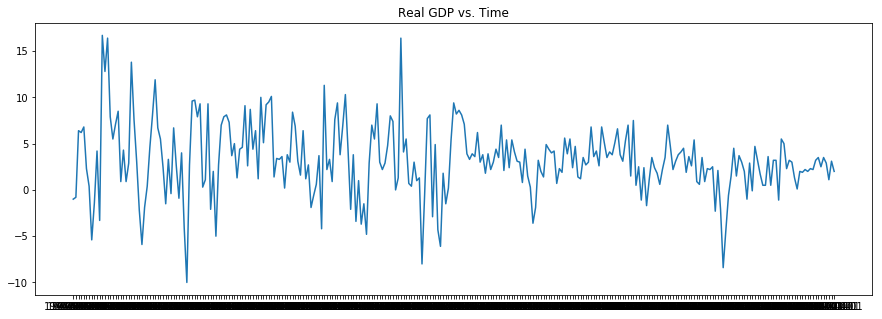

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(gdp.DATE, gdp.A191RL1Q225SBEA)
plt.title('Real GDP vs. Time')

In [9]:
from statsmodels.tsa.stattools import acf, pacf

Text(0.5, 1.0, 'MA(1) PACF')

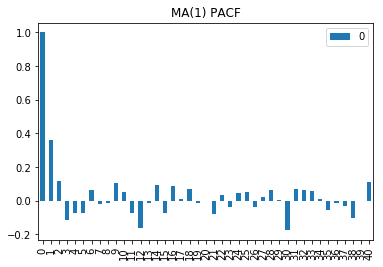

In [11]:
x_acf = pd.DataFrame(pacf(gdp.A191RL1Q225SBEA))
x_acf.plot(kind='bar')
plt.title('MA(1) PACF')

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp.A191RL1Q225SBEA, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  288
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -831.881
Method:                           css   S.D. of innovations              4.347
Date:                Wed, 16 Oct 2019   AIC                           1667.762
Time:                        14:25:56   BIC                           1675.088
Sample:                             1   HQIC                          1670.698
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0104      0.256      0.041      0.968      -0.492       0.512
Residuals Description
count    2.880000e+02
mean    -6.167906e-18
std      4.354792e+00
min     -1.231042e+01
25%     -2.835417e+00

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp.A191RL1Q225SBEA, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:        A191RL1Q225SBEA   No. Observations:                  289
Model:                     ARMA(1, 0)   Log Likelihood                -778.920
Method:                       css-mle   S.D. of innovations              3.582
Date:                Wed, 16 Oct 2019   AIC                           1563.840
Time:                        14:26:30   BIC                           1574.839
Sample:                             0   HQIC                          1568.247
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.2023      0.328      9.753      0.000       2.559       3.846
ar.L1.A191RL1Q225SBEA     0.3594      0.055      6.549      0.000       0.252       0.467
        

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp.A191RL1Q225SBEA, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:        A191RL1Q225SBEA   No. Observations:                  289
Model:                     ARMA(1, 1)   Log Likelihood                -777.809
Method:                       css-mle   S.D. of innovations              3.569
Date:                Wed, 16 Oct 2019   AIC                           1563.618
Time:                        14:27:12   BIC                           1578.284
Sample:                             0   HQIC                          1569.495
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.1981      0.356      8.979      0.000       2.500       3.896
ar.L1.A191RL1Q225SBEA     0.5157      0.104      4.948      0.000       0.311       0.720
ma.L1.A1

In [15]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(gdp.A191RL1Q225SBEA, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  288
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -777.145
Method:                       css-mle   S.D. of innovations              3.564
Date:                Wed, 16 Oct 2019   AIC                           1562.290
Time:                        14:27:32   BIC                           1576.942
Sample:                             1   HQIC                          1568.162
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0077      0.004     -2.022      0.044      -0.015      -0.000
ar.L1.D.A191RL1Q225SBEA     0.3443      0.056      6.182      0.000       0.235       0.453


In [18]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp.A191RL1Q225SBEA, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  288
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -774.302
Method:                       css-mle   S.D. of innovations              3.530
Date:                Wed, 16 Oct 2019   AIC                           1560.603
Time:                        14:28:19   BIC                           1582.581
Sample:                             1   HQIC                          1569.411
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0076      0.004     -1.847      0.066      -0.016       0.000
ar.L1.D.A191RL1Q225SBEA    -0.2589      0.272     -0.952      0.342      -0.792       0.274


The ARIMA model with order 2,1,2 is the best model as the AIC score is the Lowest.